***LAB 7 : Quantum Teleportation with All Four Bell States***

Objective : Implement teleportation protocol using each of
            the 4 Bell states as entangled resource (e-bit).

In [17]:
!pip install qiskit qiskit-aer -q

In [18]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt

*Function: Prepare one of the 4 Bell States*

In [19]:
def prepare_bell_pair(qc, qA, qB, bell_index=0):
    """
    Create Bell pair between qubits qA and qB.
    bell_index:
      0 -> |Φ+> = (|00> + |11|)/√2
      1 -> |Φ-> = (|00> - |11|)/√2
      2 -> |Ψ+> = (|01> + |10|)/√2
      3 -> |Ψ-> = (|01> - |11|)/√2
    """
    qc.h(qA)
    qc.cx(qA, qB)
    if bell_index == 1:
        qc.z(qA)
    elif bell_index == 2:
        qc.x(qA)
    elif bell_index == 3:
        qc.x(qA)
        qc.z(qA)

*Function: Prepare message state to be teleported*

In [20]:
def prepare_state(qc, q, label):
    """
    Prepare different message states.
      '0' : |0>
      '1' : |1>
      '+' : |+>
      '-' : |->
    """
    if label == '1':
        qc.x(q)
    elif label == '+':
        qc.h(q)
    elif label == '-':
        qc.x(q)
        qc.h(q)

*Function: Build full teleportation circuit*

In [31]:
def build_teleportation(bell_index, msg_state):
    q = QuantumRegister(3, 'q')
    c = ClassicalRegister(3, 'c')  # c0, c1 for Alice; c2 for Bob
    qc = QuantumCircuit(q, c)

    # Prepare message
    prepare_state(qc, q[0], msg_state)

    # Prepare Bell pair between q1 (Alice) and q2 (Bob)
    prepare_bell_pair(qc, q[1], q[2], bell_index)

    # Alice's Bell measurement
    qc.cx(q[0], q[1])
    qc.h(q[0])
    qc.measure(q[0], c[0])
    qc.measure(q[1], c[1])

    qc.barrier()

    # Measure Bob's qubit in appropriate basis
    if msg_state in ['+', '-']:
        qc.h(q[2])
    qc.measure(q[2], c[2])

    return qc

*Run Simulation for all Bell States*

In [32]:
def run_all_teleportations():
    sim = AerSimulator()
    bell_names = ["Φ+", "Φ-", "Ψ+", "Ψ-"]
    states = ['0', '1', '+', '-']

    for i in range(4):
        print(f"\n=== Using Bell State {bell_names[i]} as e-bit ===")
        for st in states:
            qc = build_teleportation(i, st)
            job = sim.run(qc, shots=1024)
            counts = job.result().get_counts(qc)
            print(f"Teleported |{st}>  -->  Measurement results: {counts}")

run_all_teleportations()


=== Using Bell State Φ+ as e-bit ===
Teleported |0>  -->  Measurement results: {'000': 257, '110': 250, '001': 259, '111': 258}
Teleported |1>  -->  Measurement results: {'010': 235, '100': 266, '011': 280, '101': 243}
Teleported |+>  -->  Measurement results: {'111': 250, '000': 248, '010': 266, '101': 260}
Teleported |->  -->  Measurement results: {'100': 247, '011': 253, '001': 262, '110': 262}

=== Using Bell State Φ- as e-bit ===
Teleported |0>  -->  Measurement results: {'001': 251, '111': 254, '110': 241, '000': 278}
Teleported |1>  -->  Measurement results: {'011': 247, '101': 261, '010': 268, '100': 248}
Teleported |+>  -->  Measurement results: {'001': 266, '110': 271, '011': 256, '100': 231}
Teleported |->  -->  Measurement results: {'101': 223, '000': 275, '010': 266, '111': 260}

=== Using Bell State Ψ+ as e-bit ===
Teleported |0>  -->  Measurement results: {'100': 246, '010': 264, '101': 246, '011': 268}
Teleported |1>  -->  Measurement results: {'000': 271, '110': 236, 

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

results = {
    "Φ+": {
        "|0>": {'000': 257, '110': 250, '001': 259, '111': 258},
        "|1>": {'010': 235, '100': 266, '011': 280, '101': 243},
        "|+>": {'111': 250, '000': 248, '010': 266, '101': 260},
        "|->": {'100': 247, '011': 253, '001': 262, '110': 262}
    },
    "Φ-": {
        "|0>": {'001': 251, '111': 254, '110': 241, '000': 278},
        "|1>": {'011': 247, '101': 261, '010': 268, '100': 248},
        "|+>": {'001': 266, '110': 271, '011': 256, '100': 231},
        "|->": {'101': 223, '000': 275, '010': 266, '111': 260}
    },
    "Ψ+": {
        "|0>": {'100': 246, '010': 264, '101': 246, '011': 268},
        "|1>": {'000': 271, '110': 236, '001': 243, '111': 274},
        "|+>": {'101': 261, '010': 271, '000': 263, '111': 229},
        "|->": {'100': 259, '011': 258, '001': 254, '110': 253}
    },
    "Ψ-": {
        "|0>": {'101': 263, '011': 249, '010': 238, '100': 274},
        "|1>": {'000': 234, '110': 263, '001': 230, '111': 297},
        "|+>": {'001': 253, '100': 259, '011': 253, '110': 259},
        "|->": {'111': 254, '010': 233, '000': 283, '101': 254}
    }
}


*Compute P(Bob = 0) for each Bell state and input message*

In [35]:
bell_states = list(results.keys())
input_states = ["|0>", "|1>", "|+>", "|->"]
prob_table = np.zeros((len(bell_states), len(input_states)))

for i, bell in enumerate(bell_states):
    for j, msg in enumerate(input_states):
        counts = results[bell][msg]
        total = sum(counts.values())
        # Bob’s bit = last bit in key
        bob_zero = sum(v for k, v in counts.items() if k[-1] == '0')
        prob_table[i, j] = bob_zero / total if total else 0

*Visualization*

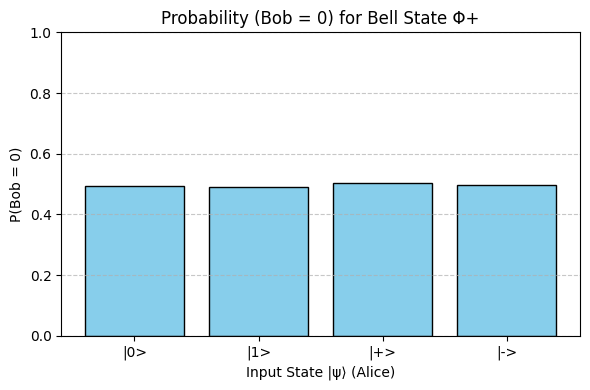

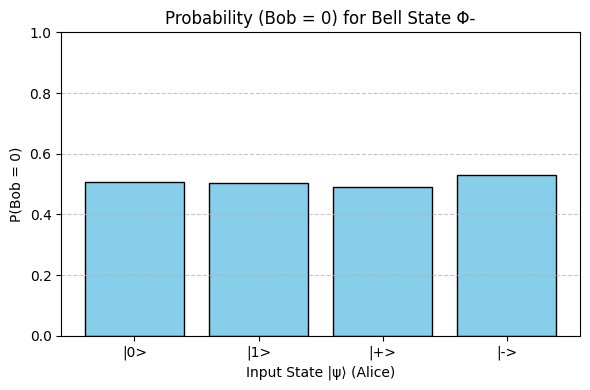

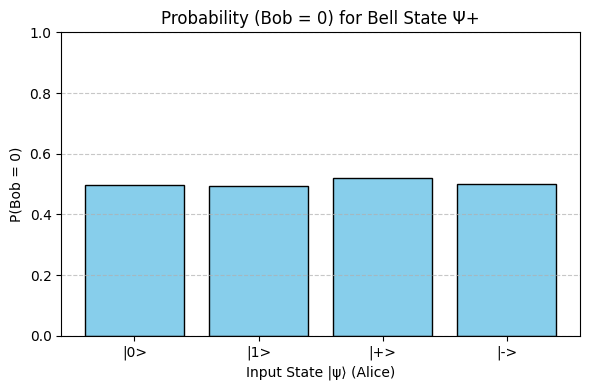

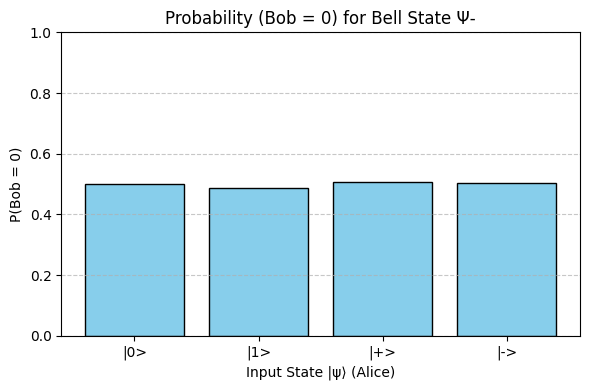

In [36]:
x = np.arange(len(input_states))
plt.style.use('seaborn-v0_8-colorblind')

for i, bell in enumerate(bell_states):
    plt.figure(figsize=(6,4))
    plt.bar(x, prob_table[i], color='skyblue', edgecolor='black')
    plt.xticks(x, input_states)
    plt.ylim(0, 1)
    plt.title(f'Probability (Bob = 0) for Bell State {bell}')
    plt.xlabel("Input State |ψ⟩ (Alice)")
    plt.ylabel("P(Bob = 0)")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

*Display summary table*

In [38]:
df = pd.DataFrame(prob_table, index=bell_states, columns=input_states)
df = df.round(3)
print("\n=== Probability that Bob measures |0> ===\n")
print(df)


=== Probability that Bob measures |0> ===

      |0>    |1>    |+>    |->
Φ+  0.495  0.489  0.502  0.497
Φ-  0.507  0.504  0.490  0.528
Ψ+  0.498  0.495  0.521  0.500
Ψ-  0.500  0.485  0.506  0.504
